## Furtos de carros

Análise de um conjunto de dados de boletins de ocorrência relacionados a furtos de carros, de São José dos Campos e Caçapava.

Por conta de furtos serem recorrentes em nossas vidas, diversas questões nos vem a cabeça ao vermos um conjunto de dados sobre este conjunto de dados. Então, neste caso, já vamos começar com algumas perguntar a serem respondidas.

- Ano de fabricação que sofre mais roubos ?
- Qual é o dia da semana em que houveram mais roubos ?
- Qual é o tipo de carro mais roubado ?
- Qual é a marca mais roubada ? 
- Qual é a média de roubos de carros por mês ?

Alem disto, um mapa de regiões roubadas também seria legal.

Inspirado em: https://github.com/guilhermeFaria/Data-Analysis-stolen-cars

In [1]:
import maya
import folium
from folium import plugins
import numpy as np
import pandas as pd
from plotnine import *

## Roubos por ano de fabricação

Vamos começar analisando os carros com maior quantidade de roubos, por ano de fabricação. Para começar, vamos analisar apenas Abril/2018.

In [2]:
roubos = pd.read_csv('../../../dados/roubos/2018/dataset_of_abril.csv', sep = ',')

In [3]:
roubos.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,NATUREZAVINCULADA,TIPOVINCULO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,2018,1118,1118/2018,01/04/2018 19:48,01/04/2018 20:05,01/04/2018,A NOITE,01/04/2018,01/04/2018 19:48,Desconhecida,...,NaN,NaN,EKY7383,SP,S.JOSE DOS CAMPOS,Preta,I/KIA SPORTAGE LX2 2.0G2,2009,2010.0,AUTOMOVEL
1,2018,1056,1056/2018,01/04/2018 23:49,02/04/2018 00:21,01/04/2018,A NOITE,01/04/2018,01/04/2018 23:49,Desconhecida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN
2,2018,1056,1056/2018,01/04/2018 23:49,02/04/2018 00:21,01/04/2018,A NOITE,01/04/2018,01/04/2018 23:49,Desconhecida,...,NaN,NaN,FRJ3777,SP,S.JOSE DOS CAMPOS,Prata,TOYOTA/COROLLA ALTIS20FX,2012,2013.0,AUTOMOVEL
3,2018,1056,1056/2018,01/04/2018 23:49,02/04/2018 00:21,01/04/2018,A NOITE,01/04/2018,01/04/2018 23:49,Desconhecida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN
4,2018,1056,1056/2018,01/04/2018 23:49,02/04/2018 00:21,01/04/2018,A NOITE,01/04/2018,01/04/2018 23:49,Desconhecida,...,NaN,NaN,FRJ3777,SP,S.JOSE DOS CAMPOS,Prata,TOYOTA/COROLLA ALTIS20FX,2012,2013.0,AUTOMOVEL


Veja que este é um conjunto com diversos dados para serem analisados. Mas aqui, vamos nos concetrar em analisar os anos dos carros mais roubados. Para começar, vamos ver quais versões (Anos) dos carros foram roubados.

Para deixar a análise mais interessante, vamos limitar somente para a região de `São José dos Campos`.

In [4]:
roubos_sjc = roubos.query("CIDADE_VEICULO == 'S.JOSE DOS CAMPOS'")

Vamos verificar quais são as cores dos carros roubados, para criar uma paleta de cores que facilite a visualização de cada carro roubado.

In [5]:
pd.unique(roubos_sjc['DESCR_COR_VEICULO'])

array(['Preta', 'Prata', 'Amarelo', 'Cinza', 'Branco', 'Verde',
       'Vermelho', 'Azul'], dtype=object)

In [6]:
cores = ["y", "#2980b9", "#f7f1e3", "#95a5a6", "#bdc3c7", "#3d3d3d", "#2ecc71", "#e74c3c"]

Bem até aqui, já temos os carros somente de São José dos Campos, vamos criar um plot, que separe os carros por ano e classifique por cor.

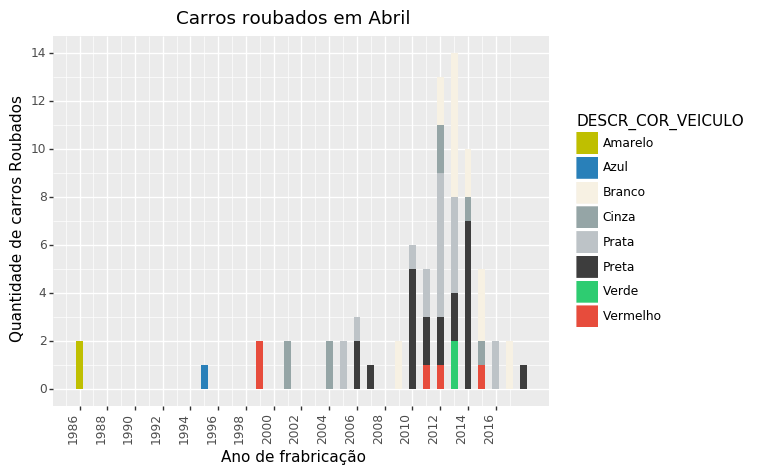

<ggplot: (-9223363248043257975)>

In [7]:
(ggplot(roubos_sjc, aes(x='ANO_MODELO', fill='DESCR_COR_VEICULO')) + 
         geom_histogram(binwidth = 0.5) + 
         labs(title = 'Carros roubados em Abril',
               y = 'Quantidade de carros Roubados',
               x = 'Ano de frabricação') + 
         scale_fill_manual(values = cores) + 
         scale_x_continuous(breaks = np.arange(1984,2018,2)) +
         scale_y_continuous(breaks = np.arange(0,16,2)) + theme(axis_text_x = element_text(angle = 90, hjust = 1))
) 

Pronto! O plot nos ajuda a responder a pergunta, e ver que os carros mais roubados são do ano de 2014 da cor branca.

## Roubos nos dias de semana

Vamos verificar agora, os dias da semana que apresentam maior quantidade de furtos. Para isto, primeiro será necessário indicar cada dia da semana, assim, sendo necessário transformar a string que está no conjunto de dados, no campo `BO_INICIADO`, em dia da semana. Para isto, será utilizado a biblioteca `maya`, que facilita a manipulação de datas em Python.

Com o auxílio desta biblioteca, vamos aplicar em todos os elementos da coluna `BO_INICIADO`, uma função, definida com `lambda`, que altere a data pelo dia da semana correspondente.

In [8]:
roubos_sjc['DIA_SEMANA'] = roubos['BO_INICIADO'].apply(lambda x: maya.when('{}/{}/{}'.format(
    x.split('/')[1], x.split('/')[0], x.split('/')[2]
)).weekday)

/home/felipe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Nesta biblioteca, os números representam:

- 1: Segunda-feira;
- 2: Terça-feira;
- 3: Quarta-feira;
- 4: Quinta-feira;
- 5: Sexta-feira;
- 6: Sábado;
- 7: Domingo;

Pronto, agora vamos criar um plot que ajude a visualizar os dados que tratamos para verificar o dia com maior quantidade de furtos.

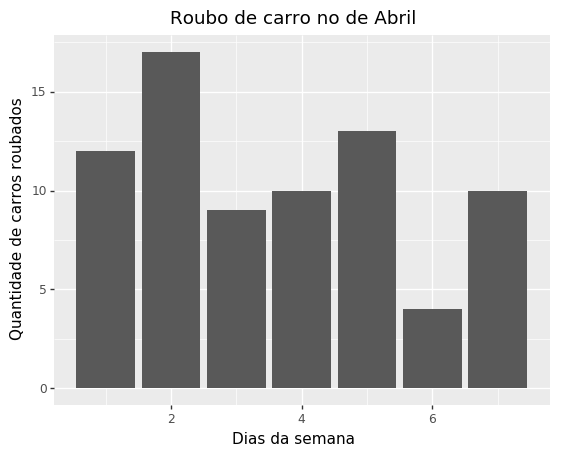

<ggplot: (-9223363248052986943)>

In [9]:
(ggplot(roubos_sjc, aes(x='DIA_SEMANA')) +
  geom_bar() +
  labs(title = 'Roubo de carro no de Abril',
       y = 'Quantidade de carros roubados',
       x = 'Dias da semana'))

Veja que surpreendentemente, o dia com maior quantidade de furtos foi a terça-feira.

## Tipo de carro mais roubado

Quais são os tipos de carros mais roubados ? Vamos descobrir com a análise abaixo.

Primeiro vamos verificar se há campos vazios, e caso haja, vamos substituir estes por `N/I`. Para isto vamos utilizar Regex (Expressões regulares)

In [10]:
import re

roubos_sjc['DESCR_TIPO_VEICULO'] = roubos_sjc['DESCR_TIPO_VEICULO'].apply(lambda x: re.sub('^$', 'N/I', x))

/home/felipe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Após realizarmos a limpeza, vamos agrupar os dados por tipo de veículo e então contar eles, isto através de uma agregação `agg`.

In [11]:
roubos_sjc.insert(0, 'Contagem', 0)
grupos_por_tipo = roubos_sjc.groupby('DESCR_TIPO_VEICULO').agg({'Contagem': 'count'})

Após realizar a agregação, vamos criar uma nova coluna, com o mesmo conteúdo que o índice, apenas para tornar o conteúdo do index disponível no DataFrame, e não apenas no index.

In [12]:
grupos_por_tipo.insert(0, 'Tipo', grupos_por_tipo.index)

Feito isto, vamos criar um plot que basicamente 

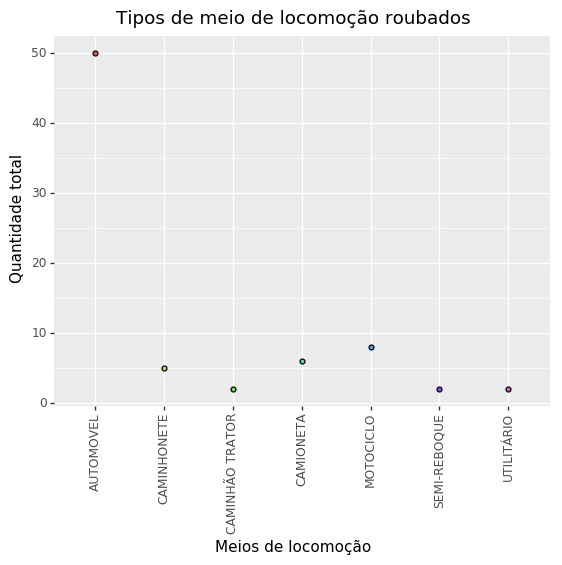

<ggplot: (8788805477433)>

In [13]:
(ggplot(grupos_por_tipo, aes(x='Tipo', y='Contagem', fill='Tipo')) +
  geom_point() +
  labs(title = 'Tipos de meio de locomoção roubados',
       y = 'Quantidade total',
       x = 'Meios de locomoção') +
  theme(axis_text_x = element_text(angle = 90), legend_position = "none"))

Beleza ! Agora já sabemos qual é o tipo de veículo mais roubado no mês de Abril.

## Fabricante mais roubado

Vamos agora, verificar qual é o fabricante mais roubado no mês de Abril. De início, vamos recuperar todas as marcas.

In [14]:
marcas_famosas_roubadas = roubos_sjc['DESCR_MARCA_VEICULO'].str.split('/', expand = True)[0]

Bom para recuperar as marcas, basicamente realizamos o split das string que estavam dentro do DataFrame. Veja que o `expand` foi utilizado para que o resultado se transformasse em DataFrame e ter sua manipulação facilitada, já que, cada resultado da divisão ficará em uma coluna. Neste caso a recuperação da primeira coluna é feita justamente para recuperar o resultando somente com o nome das marcas.

In [15]:
marcas_famosas_roubadas.head(5)

0             I
2        TOYOTA
4        TOYOTA
9     CHEVROLET
11        HONDA
Name: 0, dtype: object

Aqui, faremos também um filtro de marcas, buscando somente as mais conhecidas, vamos lá.

In [16]:
carros_famosos_roubados = marcas_famosas_roubadas[marcas_famosas_roubadas.isin([
        "FIAT", "HONDA", "PEUGEOT", "FORD", "TOYOTA","YAMAHA"
])]

In [17]:
# Apenas transformando em DataFrame com uma coluna de nome marcas
carros_famosos_roubados = pd.DataFrame({'marcas': carros_famosos_roubados.values})

Pronto, agora temos um conjunto de dados filtrado, sendo apenas carros de São José dos Campos, e com marcas especificas (Filtradas acima). Vamos agora fazer um plot que nos ajude a entender os dados filtrados.

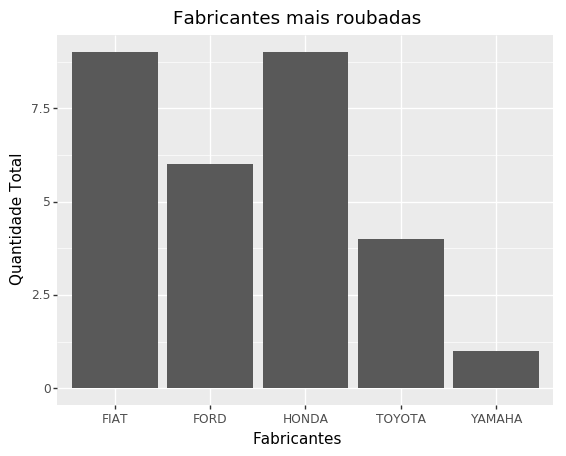

<ggplot: (-9223363248049267887)>

In [18]:
(ggplot(carros_famosos_roubados, aes(x='marcas')) + geom_bar() +
  labs(title = 'Fabricantes mais roubadas',
        y = 'Quantidade Total',
        x = 'Fabricantes'))

Veja que legal, nossas perguntas estão sendo respondidas diretamente do conjunto de dados! Através de análises. Por fim, vamos criar um mapa que nos permita verificar as àrea que mais tiveram problemas com furtos

## Mapa de ocorrências

Para criar o mapa, faremos a utilização da biblioteca `folium` junto aos dados de geolocalização (Latitude e Longitude) disponíveis no conjunto de dados análisado. 

Primeiro criamos o objeto do mapa. Na criação deste objeto, passamos para ele a georeferência inicial, junto ao zoom que devem ser feito no ponto.

In [19]:
sjc = folium.Map( 
    location = [-23.1830179,-45.8927126],
    zoom_start=11
)

Agora, vamos recuperar a latitude e a longitude dos furtos, e em seguida inseri-los no mapa com o `HeatMap`, que facilita na definição de mapas de calor.

In [20]:
coordenadas = roubos[['LATITUDE', 'LONGITUDE']].dropna().values

In [21]:
sjc.add_child(plugins.HeatMap(coordenadas))
sjc